#### Importar as bibliotecas

In [36]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
import numpy as np
from scipy.stats import skew, kurtosis

#### Dataframe (criando as variáveis e visualizando os dados)

In [37]:
# Carregando o dataframe a partir do arquivo CSV
df = pd.read_csv('grupo9_projeto9.csv', sep=';')

print(df.to_string())  # Mostra todas as linhas e colunas

      site_id  mean_annual_precip_mm  sand_fraction_pct  soil_erosion_t_per_ha_yr
0    Site_001                 1149.9               51.2                     4.598
1    Site_002                 1357.2               38.4                     5.899
2    Site_003                 1355.3               53.9                     3.122
3    Site_004                 1909.6               53.1                     0.808
4    Site_005                 1158.3               33.3                     3.385
5    Site_006                 1040.0               68.5                     3.862
6    Site_007                  831.7               47.0                     3.201
7    Site_008                  951.4               51.3                     4.365
8    Site_009                 1372.8               54.5                     0.954
9    Site_010                 1484.5               62.0                     3.254
10   Site_011                 1255.6               57.3                     4.273
11   Site_012   

#### Medidas de posição (média, mediana e moda)

In [38]:
from scipy.stats import mode

# Lista das variáveis da lista
variaveis = ['mean_annual_precip_mm', 'sand_fraction_pct', 'soil_erosion_t_per_ha_yr']

print("\n--- Medidas de Posição: Média, Moda e Mediana ---")

for var in variaveis:
    media = df[var].mean()
    mediana = df[var].median()
    # Calculando a moda (a scipy.stats.mode retorna um array, então usa-se [0] pra pegar o valor)
    moda_resultado = mode(df[var], keepdims=True)
    moda = moda_resultado.mode[0]
    
    print(f"\n{var}:")
    print(f"Média: {media:.2f}")
    print(f"Mediana: {mediana:.2f}")
    print(f"Moda: {moda:.2f}")



--- Medidas de Posição: Média, Moda e Mediana ---

mean_annual_precip_mm:
Média: 1305.88
Mediana: 1297.05
Moda: 1081.40

sand_fraction_pct:
Média: 48.17
Mediana: 47.75
Moda: 46.80

soil_erosion_t_per_ha_yr:
Média: 3.29
Mediana: 3.24
Moda: 0.01


#### Assimetria e Curtose

In [39]:
print("\n--- Assimetria e Curtose ---")
for coluna in ['mean_annual_precip_mm', 'sand_fraction_pct', 'soil_erosion_t_per_ha_yr']:
    assimetria = skew(df[coluna])
    curtose = kurtosis(df[coluna])
    print(f"{coluna}: Assimetria = {assimetria:.4f}, Curtose = {curtose:.4f}")


--- Assimetria e Curtose ---
mean_annual_precip_mm: Assimetria = -0.1513, Curtose = -0.0708
sand_fraction_pct: Assimetria = -0.1582, Curtose = 0.3391
soil_erosion_t_per_ha_yr: Assimetria = 0.1603, Curtose = -0.3273


#### Representação gráfica (histrograma, boxplot e gráfico de dispersão)

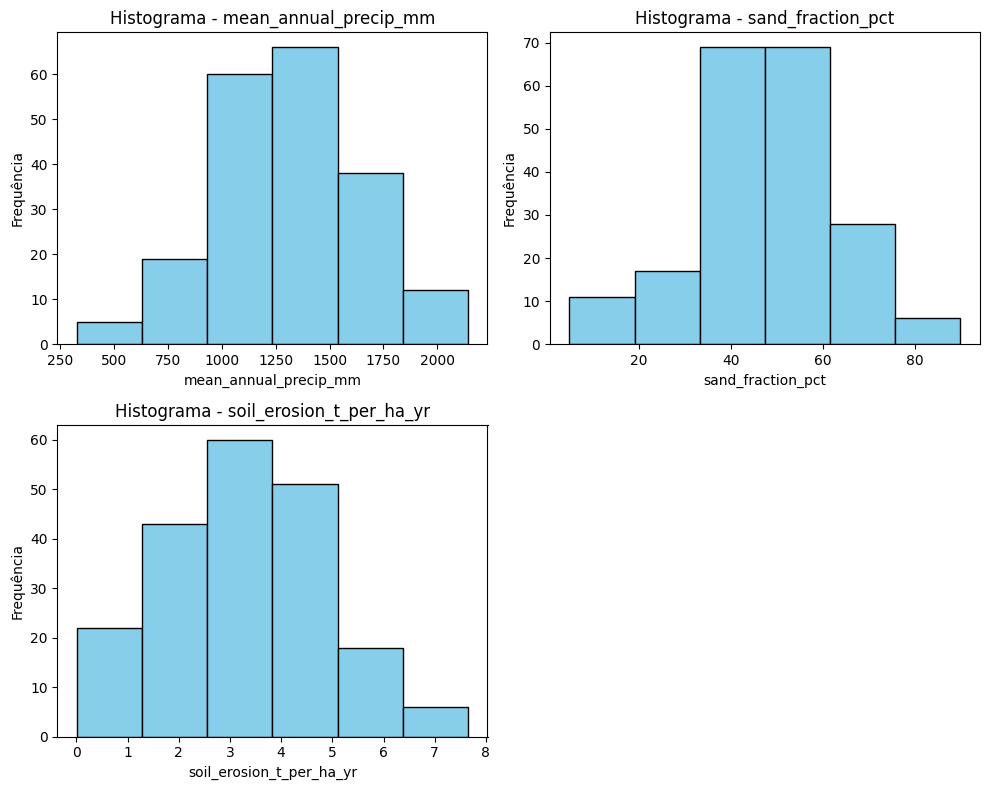

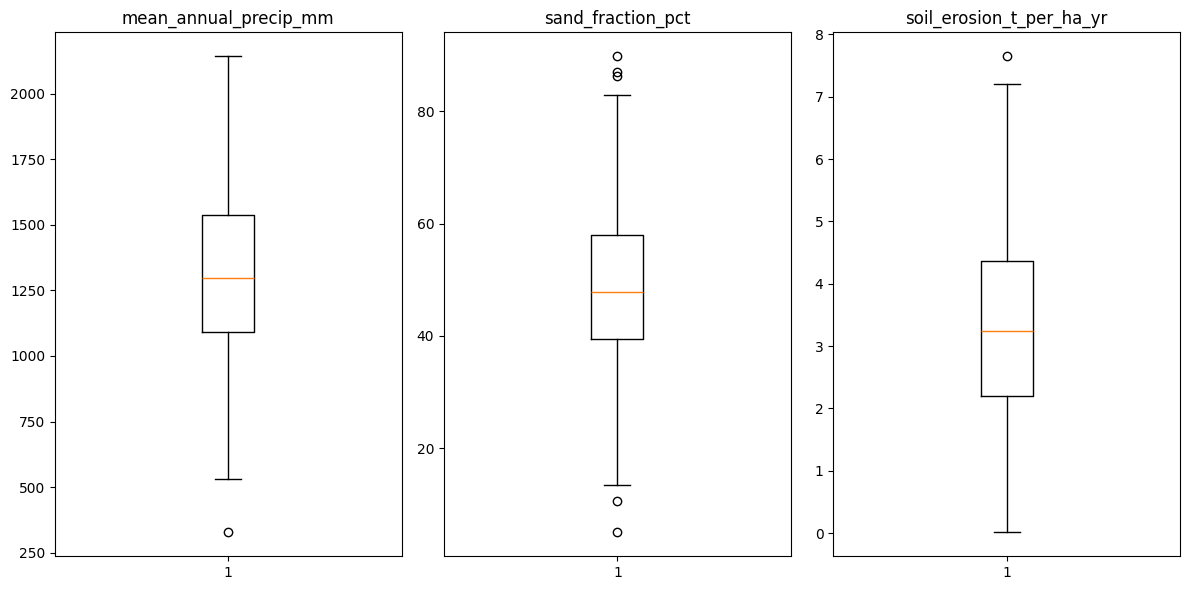

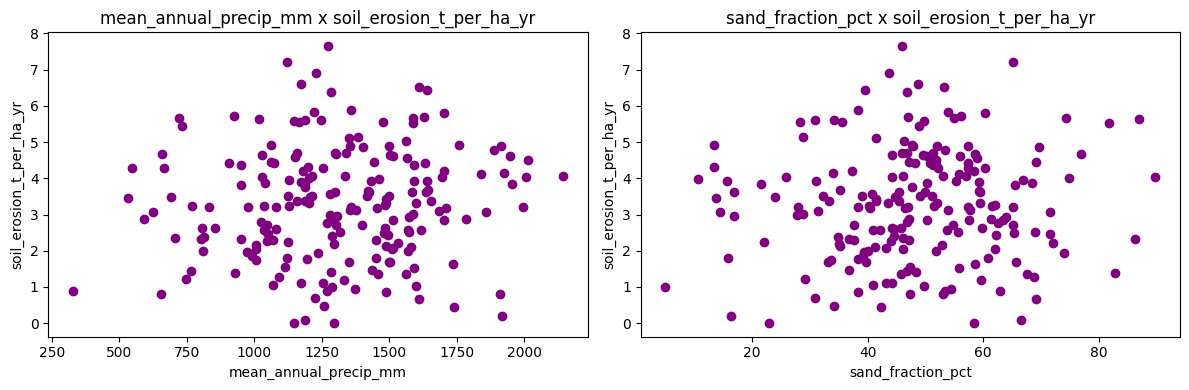

In [40]:
# Histogramas (distribuição das variáveis)
plt.figure(figsize=(10, 8))
variaveis = ['mean_annual_precip_mm', 'sand_fraction_pct', 'soil_erosion_t_per_ha_yr']
for i, var in enumerate(variaveis):
    plt.subplot(2, 2, i+1)
    plt.hist(df[var], bins=6, color='skyblue', edgecolor='black')
    plt.title(f'Histograma - {var}')
    plt.xlabel(var)
    plt.ylabel('Frequência')
plt.tight_layout()
plt.show()

# Boxplots (dispersão e outliers)
plt.figure(figsize=(12, 6))
for i, var in enumerate(variaveis):
    plt.subplot(1, 3, i+1)
    plt.boxplot(df[var])
    plt.title(var)
plt.tight_layout()
plt.show()

# Gráficos de Dispersão (cada variável x soil_erosion_t_per_ha_yr)
plt.figure(figsize=(12, 4))
for i, var in enumerate(variaveis[:-1]):  # Não incluir erosão como X
    plt.subplot(1, 2, i+1)
    plt.scatter(df[var], df['soil_erosion_t_per_ha_yr'], color='purple')
    plt.xlabel(var)
    plt.ylabel('soil_erosion_t_per_ha_yr')
    plt.title(f'{var} x soil_erosion_t_per_ha_yr')
plt.tight_layout()
plt.show()

#### Matriz da correlação


--- Matriz de Correlação ---
                          mean_annual_precip_mm  sand_fraction_pct  \
mean_annual_precip_mm                  1.000000          -0.156567   
sand_fraction_pct                     -0.156567           1.000000   
soil_erosion_t_per_ha_yr               0.075188           0.069583   

                          soil_erosion_t_per_ha_yr  
mean_annual_precip_mm                     0.075188  
sand_fraction_pct                         0.069583  
soil_erosion_t_per_ha_yr                  1.000000  


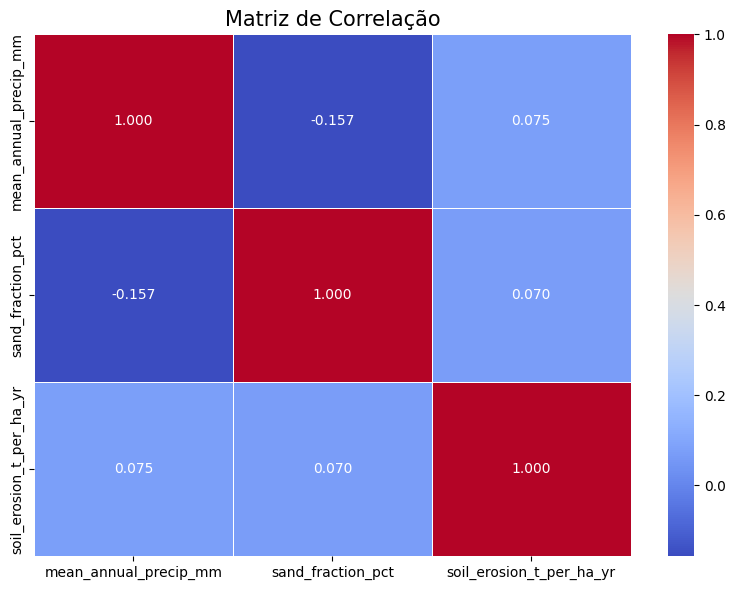

In [41]:
# Removendo a coluna 'site_id' antes de calcular a correlação
df_para_analise = df.drop('site_id', axis=1)

# Calculando a matriz de correlação
matriz_correlacao_corrigida = df_para_analise.corr()

# Exibindo a matriz no console
print("\n--- Matriz de Correlação ---")
print(matriz_correlacao_corrigida)

# Gráfico heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(matriz_correlacao_corrigida, 
            annot=True,          # Mostrar os valores numéricos
            cmap='coolwarm',     # Mesma paleta de cores da imagem
            fmt=".3f",           # Três casas decimais
            linewidths=0.5)      # Espaço entre os quadrados
plt.title('Matriz de Correlação', fontsize=15)
plt.tight_layout()
plt.show()

#### Regressão Linear


--- Regressão Linear Simples para cada variável ---

Variável: mean_annual_precip_mm
Equação da reta: soil_erosion_t_per_ha_yr = 0.0004 * mean_annual_precip_mm + 2.8290
R²: 0.0057


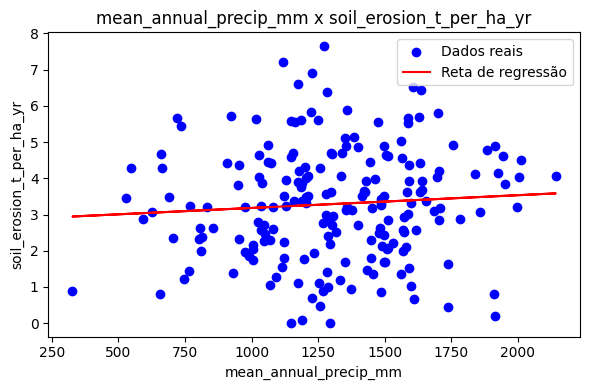


Variável: sand_fraction_pct
Equação da reta: soil_erosion_t_per_ha_yr = 0.0071 * sand_fraction_pct + 2.9491
R²: 0.0048


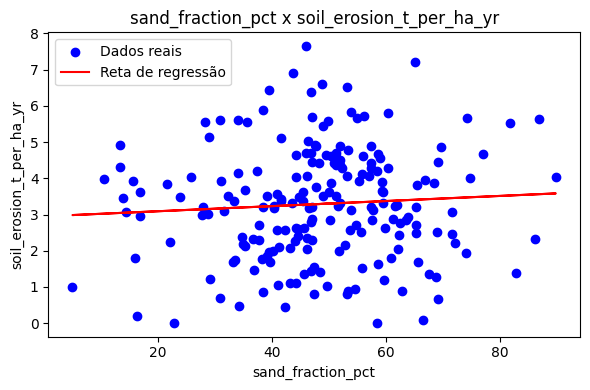


Variável: soil_erosion_t_per_ha_yr
Equação da reta: soil_erosion_t_per_ha_yr = 1.0000 * soil_erosion_t_per_ha_yr + 0.0000
R²: 1.0000


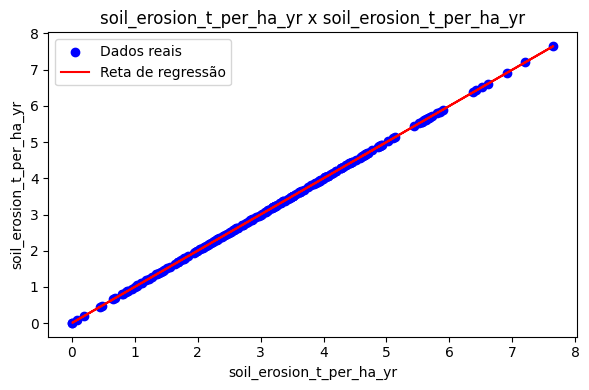

In [42]:
# Variáveis independentes (explicativas)
variaveis_explicativas = ['mean_annual_precip_mm', 'sand_fraction_pct', 'soil_erosion_t_per_ha_yr']

# Variável dependente
y = df['soil_erosion_t_per_ha_yr']

print("\n--- Regressão Linear Simples para cada variável ---")

for var in variaveis_explicativas:
    X = df[[var]]  # Transformando em matriz 2D (requisito do sklearn)
    
    # Criando o modelo
    modelo = LinearRegression()
    modelo.fit(X, y)
    
    # Parâmetros para a regressão
    a = modelo.coef_[0]
    b = modelo.intercept_
    r2 = modelo.score(X, y)
    
    # Exibindo os resultados
    print(f"\nVariável: {var}")
    print(f"Equação da reta: soil_erosion_t_per_ha_yr = {a:.4f} * {var} + {b:.4f}")
    print(f"R²: {r2:.4f}")
    
    # Plotando o gráfico da regressão
    plt.figure(figsize=(6, 4))
    plt.scatter(X, y, color='blue', label='Dados reais')
    plt.plot(X, modelo.predict(X), color='red', label='Reta de regressão')
    plt.xlabel(var)
    plt.ylabel('soil_erosion_t_per_ha_yr')
    plt.title(f'{var} x soil_erosion_t_per_ha_yr')
    plt.legend()
    plt.tight_layout()
    plt.show()
